In [2]:
import numpy as np
import scipy as sc
from scipy import stats
import matplotlib.pyplot as plt
from fontsettings import set_font_settings

In [4]:
set_font_settings()

### 1 Успешность прототипа
-------------------------------------------
Известно что компания конкурент выпустила 1000 прототипов игр, из которых было 5 
успешных. Наша компания выпустила 200 прототипов из которых ни один не был 
успешен.
Какова вероятность что следующий (201й) наш прототип будет успешен? Решите задачу 
классическим и баесовским подходами

In [195]:
# rival parameters
m_rival, n_rival = 5, 1000
# self parameters
m_self, n_self = 0, 200

### Решение (классический подход):
------------------------------------------------
Используя частотное определение вероятности:
$$ P = \lim_{n \to \infty } \frac{m}{n} \tag{1},$$
где $n$, $m$ - общее и благоприятное число исходов статистических испытаний, соответственно

С учетом опыта компании конкурента, точечная оценка вероятности успеха прототипа составляет:
$$ \hat{P} = \frac{5}{1000} = 0.005 $$

В предположении о независимости событий (классический подход) точечная оценка вероятности того, что
201 прототип будет успешным также равна $ \hat{P} = 0.005 $


Распределение количества «успехов» в последовательности из $𝑛$ независимых случайных экспериментов описывается биномиальным распределением.
Нижняя и верхняя границы доверительного интервала для вероятности успеха следующего прототипа определяются соотношениями $[1]$:
$$ \pi = X\left(\alpha, m, n-m+1 \right) \tag{2}$$
$$ \Pi = X\left(1-\alpha, m+1, n-m \right) \tag{3}$$
где $\pi$, $\Pi$ - нижняя и верхняя границы доверительного интервала, соответственно; $X$ - $\alpha \cdot 100 \%$-ый квантиль B-распределения,
$\alpha$ - вероятность ошибки первого рода (уровень значимости)

In [196]:
# point estimation
p_ = m_rival / n_rival

In [248]:
# confidence probability
p_confidence = 0.95
# p-value for two side confidence interval
alpha_twoside = 1 - p_confidence

# interval bounds
lb = stats.beta.interval(alpha_twoside, m_rival, n_rival-m_rival+1)[0]
ub = stats.beta.interval(alpha_twoside, m_rival+1, n_rival-m_rival)[1]

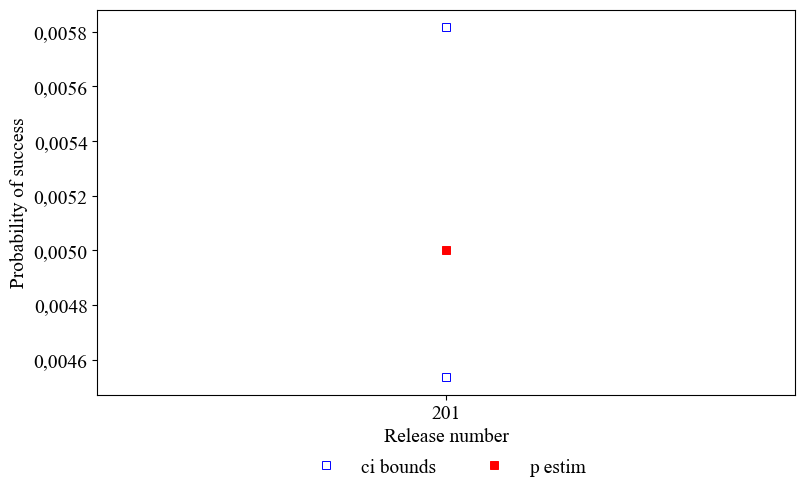

In [249]:
releas_num = 201
yy = [lb, ub]
xx = [201] * len(yy)

# plot the result
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(xx, yy, lw=0, marker='s', mec='b', mfc='w', mew=0.7, label='ci bounds')
ax.plot(releas_num, p_, lw=0, marker='s', mec='r', mfc='r', mew=0.7, label='p estim')
# plot settings
ax.set_xticks([releas_num])
ax.set(xlabel='Release number', ylabel='Probability of success')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=2, frameon=False)

### Ответ (классический подход):

In [259]:
print(f'Probability is: {np.round(p_, 4)}')
print(f'Confidence interval is: ({np.round(lb, 4)}, {np.round(ub, 4)}) with confidence probability equal to {p_confidence}')

Probability is: 0.005
Confidence interval is: (0.0045, 0.0058) with confidence probability equal to 0.95


### Решение (байесовский подход):
----------------------------------------------------------------
По теореме Байеса $[2]$:
$$P(A|B)=\frac{P\left( A \right) \cdot P(B|A)}{P(B)} \tag{4},$$ где
* $P(A)$ - априоная вероятность гипотезы $A$
* $P(A|B)$ - вероятность гипотезы $A$ при наступлении события $B$ (апостериорная вероятность)
* $P(B|A)$ - вероятность наступления события $B$ при истинности гипотезы $A$ (правдоподобие)
* $P(B)$ - полная вероятность наступления события $B$

В качестве априорного распределения вероятности успеха выберем бета распределение:
$$f(a,b,p)=\frac{1}{B\left( a, b \right)}\cdot p^{a-1}\cdot(1-p)^{b-1} \tag{5},$$
где $B\left( a, b \right)$ - B-функция Эйлера

C:\Users\Danis Garipov\AppData\Local\Temp\ipykernel_5940\573015507.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=2, frameon=False)


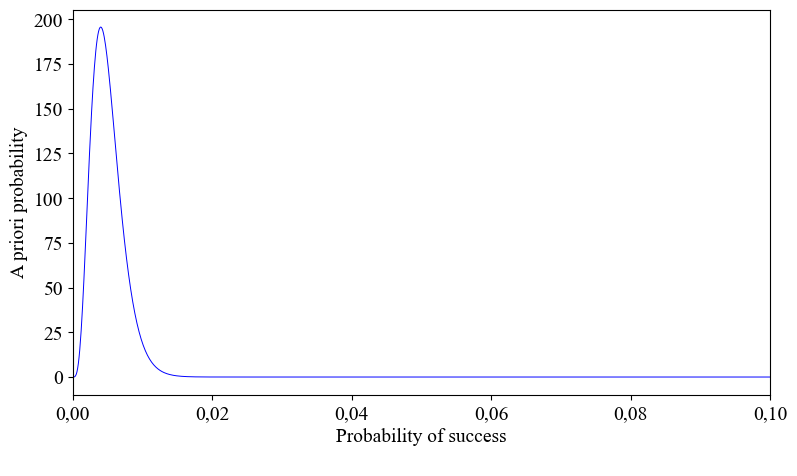

In [250]:
# a priori distribution of success probability value
pp = np.linspace(0, 1, 10001)
distr_apriori = stats.beta(m_rival, n_rival-m_rival)

# plot the result
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(pp, distr_apriori.pdf(pp), lw=0.7, color='b')
# plot settings
ax.set(xlabel='Probability of success', ylabel='A priori probability', xlim=(0, 0.1))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=2, frameon=False)

Правдоподобие того, что $t$ прототипов было успешными, а $h$ - нет, составляет:
$$L(p)={}p^{t}\cdot(1-p)^{h} \tag{6}$$

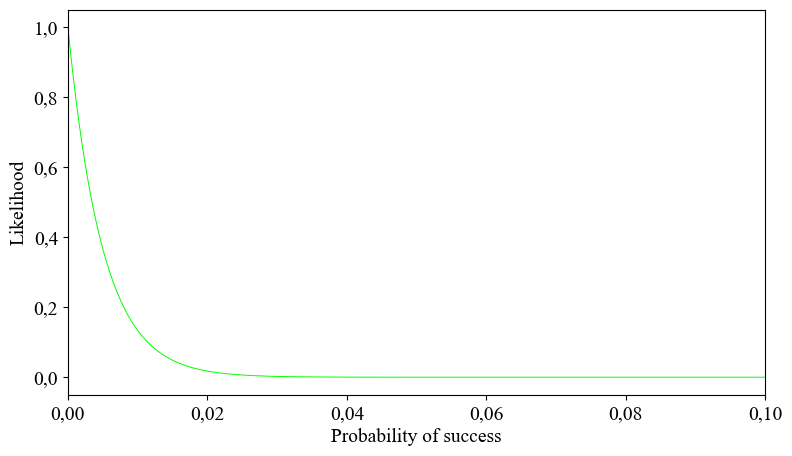

In [251]:
likelihood = lambda t, h, p: p**t * (1 - p)**h

# plot the result
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(pp, likelihood(m_self, n_self, pp), lw=0.7, color='#00FF00')
# plot settings
ax.set(xlabel='Probability of success', ylabel='Likelihood', xlim=(0, 0.1));
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=2, frameon=False)

Тогда, учитывая, что в данном случае априорное распределение является сопряженным, можно получить соотношение, описывающее апостериорное распределение:
$$g(p)=f(a,b,p) \cdot L(p) \propto f(a+t,b+h,p) \tag{7}$$

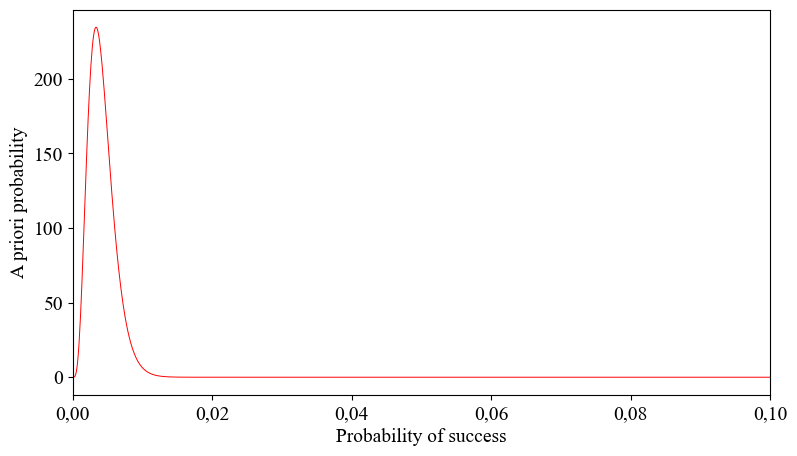

In [252]:
# a posteriori distribution of success probability value
distr_aposteriori = stats.beta(a_total, b_total)

# plot the result
fig, ax = plt.subplots(figsize=(9, 5))
ax.plot(pp, distr_aposteriori.pdf(pp), lw=0.7, color='r')
# plot settings
ax.set(xlabel='Probability of success', ylabel='A priori probability', xlim=(0, 0.1));
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=2, frameon=False)

In [253]:
p_bayes_ = np.mean(pp * distr_aposteriori.pdf(pp))
print(np.round(p_bayes_, 4))

0.0042


Среднее значение вероятности успеха следующего прототипа равно:
$$\bar{P}=0.0042$$

### Ответ (байесовский подход):

In [260]:
print(f'Expectation of probability is: {np.round(p_bayes_, 4)}')

Expectation of probability is: 0.0042


### Источники
1. Таблицы математической статистики. Большев Л.Н., Смирнов Н.В. - М.: Наука. Главная редакция физико-математической литературы, 1983. - 416 с., стр. 69
2. Николенко С., Кадурин А., Архангельская Е. Глубокое обучение. - СПб.: Питер 2022. - 480 с.: ил. - (Серия "Библиотека программиста"), стр. 47